In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from utils import stop_words, make_corpus_df, get_data_by_year, make_total_word_count_df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dylanlewis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dylanlewis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dylanlewis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data_dir = './TelevisionNewsV2'
corpus_df = make_corpus_df(data_dir)

data_2009, data_2019, data_2020 = get_data_by_year(corpus_df, 2009), get_data_by_year(corpus_df, 2019), get_data_by_year(corpus_df, 2020)
data_19_20 = pd.concat([data_2019, data_2020])

In [3]:
total_word_count_df_2009 = make_total_word_count_df(data_2009, stop_words, '2009')
total_word_count_df_19_20 = make_total_word_count_df(data_19_20, stop_words, '19_20')

In [4]:
all_words = pd.concat([total_word_count_df_2009['word'], total_word_count_df_19_20['word']], axis=0, ignore_index=True)
all_words = all_words.unique()

In [5]:
joint_2009_19_20_df = pd.DataFrame(data={'word': all_words})
joint_2009_19_20_df = joint_2009_19_20_df.merge(total_word_count_df_19_20, how='left', on='word')
joint_2009_19_20_df = joint_2009_19_20_df.merge(total_word_count_df_2009, how='left', on='word')
joint_2009_19_20_df.fillna(0, inplace=True)

joint_2009_19_20_df['rel_frequency_diff'] = joint_2009_19_20_df['rel_frequency_19_20'] - joint_2009_19_20_df['rel_frequency_2009']
joint_2009_19_20_df.sort_values('rel_frequency_diff', ascending=False, inplace=True)

In [6]:
top_30_entries = joint_2009_19_20_df.head(30)

In [7]:
top_30_entries

,word,total_count_19_20,rel_frequency_19_20,total_count_2009,rel_frequency_2009,rel_frequency_diff
18312,trump,1520.0,0.005435,0.0,0.000000,0.005435
2175,crisis,1623.0,0.005803,78.0,0.000618,0.005185
4931,issue,2289.0,0.008184,478.0,0.003787,0.004397
1278,candidate,859.0,0.003071,16.0,0.000127,0.002944
2450,democrat,1105.0,0.003951,155.0,0.001228,0.002723
6186,new,1715.0,0.006132,459.0,0.003637,0.002495
3285,everywhere,664.0,0.002374,5.0,0.000040,0.002334
6764,people,2262.0,0.008088,734.0,0.005816,0.002272
9502,touched,636.0,0.002274,9.0,0.000071,0.002203
6901,plan,876.0,0.003132,120.0,0.000951,0.002181


In [8]:
top_30_words = top_30_entries['word']
top_30_rel_freq_diffs = top_30_entries['rel_frequency_diff']

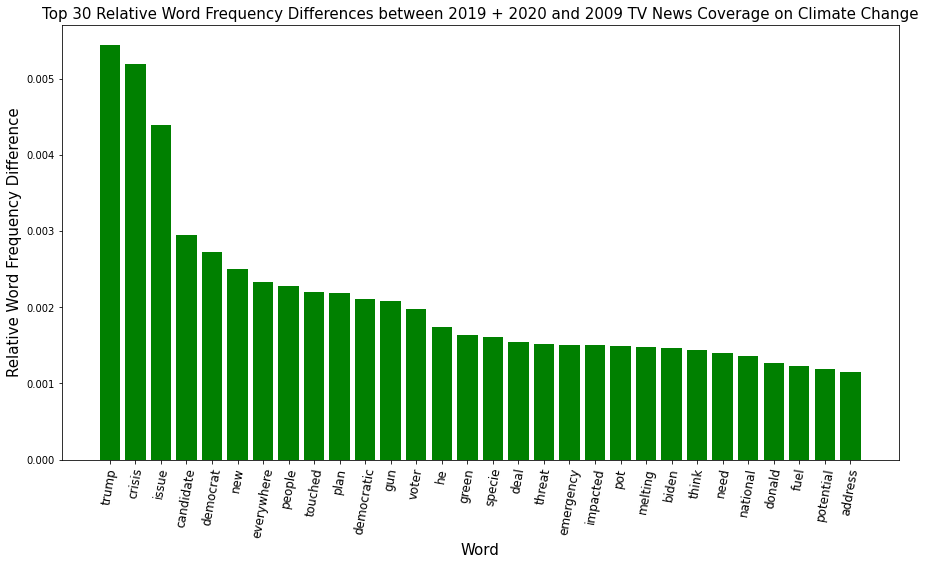

In [9]:
x = np.arange(len(top_30_words))
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x, top_30_rel_freq_diffs, color='green')
ax.set_title('Top 30 Relative Word Frequency Differences between 2019 + 2020 and 2009 TV News Coverage on Climate Change', fontsize=15)
ax.set_ylabel('Relative Word Frequency Difference', fontsize=15)
ax.set_xlabel('Word', fontsize=15)
ax.set_xticks(x)
plt.xticks(rotation=80)
ax.set_xticklabels(top_30_words, fontsize=12)
fig.savefig('./plots/rel_freq_diff_19_20_2009.png')
plt.show()

From the plot of the top 30 relative word frequency differences between 2019 + 2020 and 2009, we notice that the president during 2019 + 2020, Donald Trump, is mentioned the most. Along with Donald Trump, other words and phrases related politics are mentioned more so in 2019 + 2020 than in 2009 including candidate, democrat (democratic), voter, biden, and the green new deal. These words likely show up more in the TV News of 2019 + 2020 since Joe Biden was a leading democratic candidate for the 2020 presidential election and democratic policies in regards to climate change are typically green (including the Green New Deal). Lastly, we observe words indicative of ubiquitous crisis being used to describe climate change more so in 2019 + 2020 than in 2009 including crisis, issue, everywhere, people, emergency, threat, impacted, need, and national.